<a href="https://colab.research.google.com/github/danangdb/latihan/blob/main/Stats_Busines_Prediksi_Sewa_ATM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# load library dan viasualisasi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import model
import statsmodels.formula.api as smf

#import statistics
import scipy.stats as stats


In [2]:
#import data from google drive
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_excel('/content/gdrive/MyDrive/Data Science/dataset/sewa_atm.xlsx')


In [4]:
# cek jumlah data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cbd          51 non-null     float64
 1   galeri       51 non-null     int64  
 2   komersial    51 non-null     int64  
 3   indoor       51 non-null     int64  
 4   perkantoran  51 non-null     int64  
 5   row          51 non-null     float64
 6   tahun        51 non-null     int64  
 7   tb           51 non-null     int64  
 8   akses        51 non-null     int64  
 9   nilai        51 non-null     float64
dtypes: float64(3), int64(7)
memory usage: 4.1 KB


In [5]:
# menampilkan 5 data  teratas
df.head()

,cbd,galeri,komersial,indoor,perkantoran,row,tahun,tb,akses,nilai
0,186.0,1,0,0,0,10.0,7,1,0,1.212121e+07
1,1855.0,1,0,0,0,10.0,8,1,0,1.060606e+07
2,1195.0,0,0,0,0,8.0,7,1,1,1.333333e+07
3,1356.0,1,1,0,0,10.0,8,1,1,1.010101e+07
4,160.0,0,0,1,1,6.0,9,1,0,1.181818e+07


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cbd,51.0,1.175142e+03,1.579172e+03,6.000000e+00,315.5,8.570000e+02,1.226000e+03,8.836000e+03
galeri,51.0,4.117647e-01,4.970501e-01,0.000000e+00,0.0,0.000000e+00,1.000000e+00,1.000000e+00
komersial,51.0,4.509804e-01,5.025426e-01,0.000000e+00,0.0,0.000000e+00,1.000000e+00,1.000000e+00
indoor,51.0,5.882353e-02,2.376354e-01,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.000000e+00
perkantoran,51.0,2.352941e-01,4.284033e-01,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.000000e+00
row,51.0,8.774510e+00,1.803646e+00,4.500000e+00,8.0,8.000000e+00,1.000000e+01,1.200000e+01
tahun,51.0,7.901961e+00,8.063474e-01,7.000000e+00,7.0,8.000000e+00,9.000000e+00,9.000000e+00
tb,51.0,6.666667e-01,4.760952e-01,0.000000e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00
akses,51.0,4.705882e-01,5.041008e-01,0.000000e+00,0.0,0.000000e+00,1.000000e+00,1.000000e+00
nilai,51.0,1.288052e+07,3.368864e+06,7.272727e+06,10101010.0,1.212121e+07,1.515152e+07,2.020202e+07


In [7]:
df.head(2)

,cbd,galeri,komersial,indoor,perkantoran,row,tahun,tb,akses,nilai
0,186.0,1,0,0,0,10.0,7,1,0,1.212121e+07
1,1855.0,1,0,0,0,10.0,8,1,0,1.060606e+07


## EDA

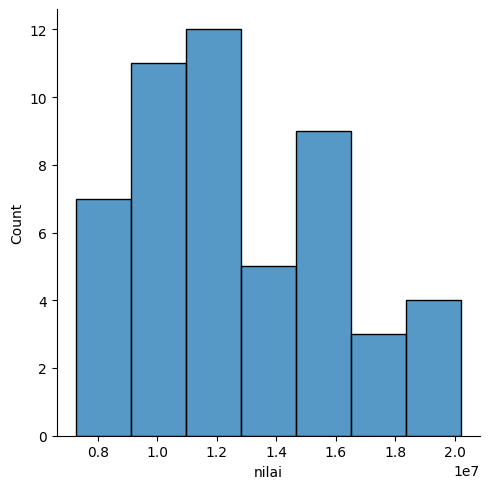

In [8]:
sns.displot(data = df, x = "nilai" )
     

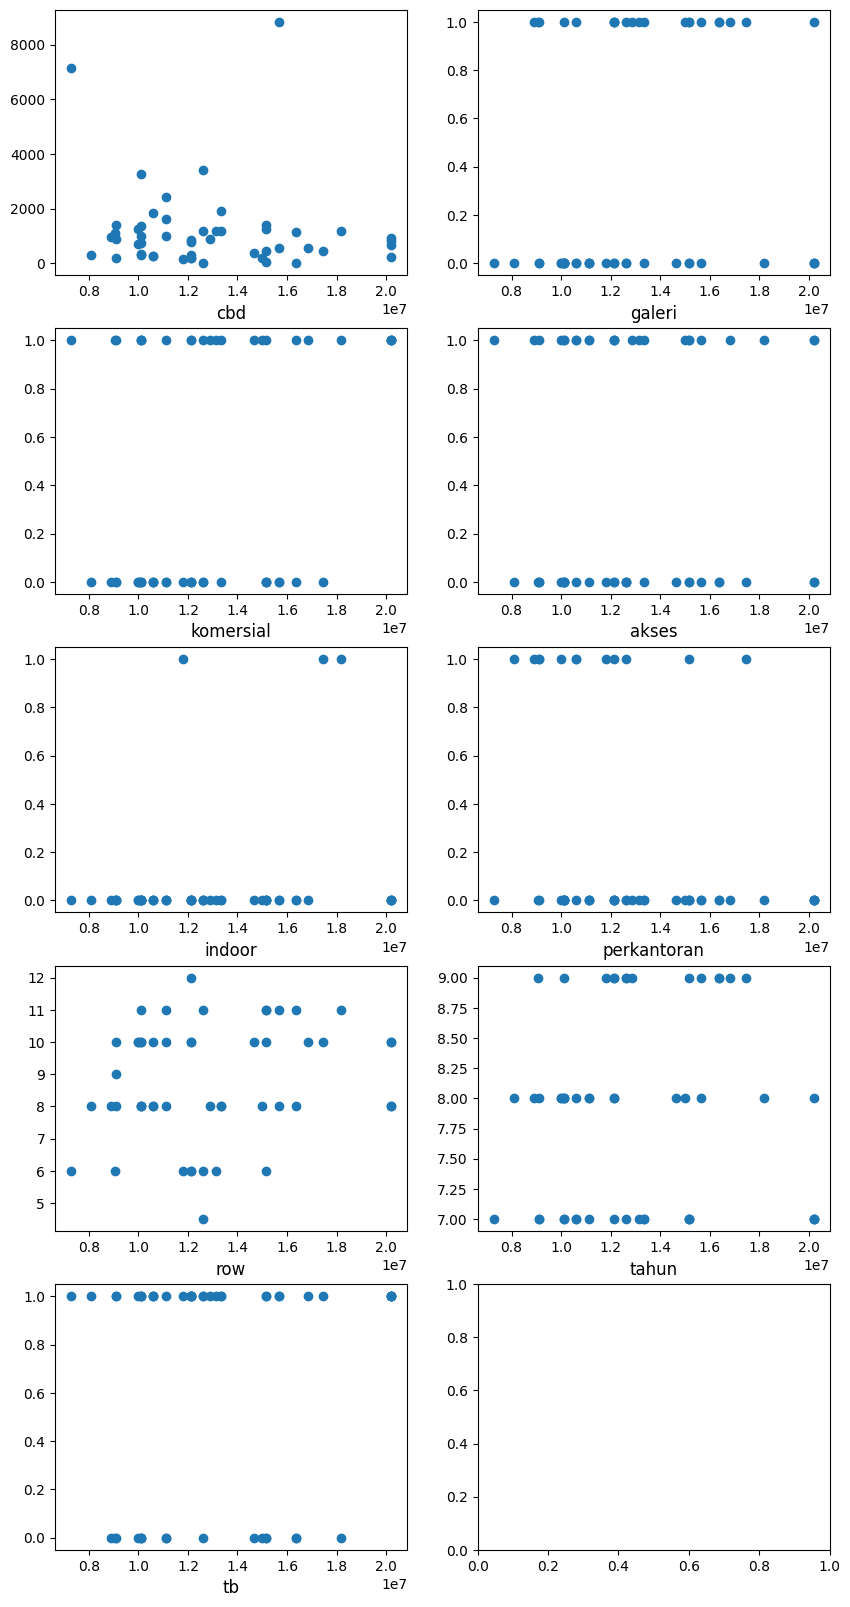

In [9]:
fig, axes = plt.subplots(nrows =5, ncols=2, figsize=[10,20])
axes[0][0].scatter(df["nilai"], df["cbd"])
axes[0][1].scatter(df["nilai"], df["galeri"])
axes[1][0].scatter(df["nilai"], df["komersial"])
axes[1][1].scatter(df["nilai"], df["akses"])
axes[2][0].scatter(df["nilai"], df["indoor"])
axes[2][1].scatter(df["nilai"], df["perkantoran"])
axes[3][0].scatter(df["nilai"], df["row"])
axes[3][1].scatter(df["nilai"], df["tahun"])
axes[4][0].scatter(df["nilai"], df["tb"])


axes[0][0].set_xlabel("cbd", fontsize=12)
axes[0][1].set_xlabel("galeri", fontsize=12)
axes[1][0].set_xlabel("komersial", fontsize=12)
axes[1][1].set_xlabel("akses", fontsize=12)
axes[2][0].set_xlabel("indoor", fontsize=12)
axes[2][1].set_xlabel("perkantoran", fontsize=12)
axes[3][0].set_xlabel("row", fontsize=12)
axes[3][1].set_xlabel("tahun", fontsize=12)
axes[4][0].set_xlabel("tb", fontsize=12)



plt.show()


## Uji Statistik

rata-rata nilai sewa pada sample = $12880522.2
Standard deviation  = $3335672.46


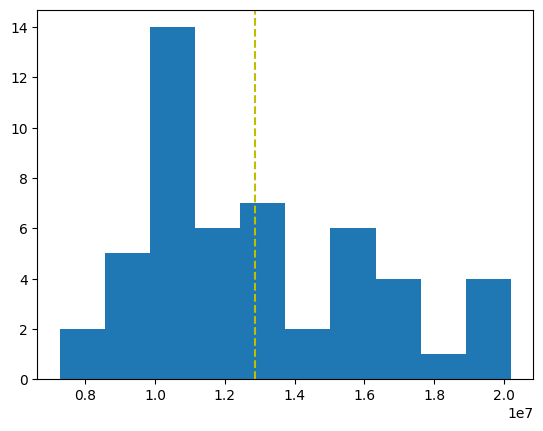

In [10]:
plt.hist(df["nilai"])

mean_df = np.mean(df["nilai"])
std_df = np.std(df["nilai"])

print(f"rata-rata nilai sewa pada sample = ${np.round(mean_df,2)}")
print(f"Standard deviation  = ${np.round(std_df,2)}")

plt.axvline(mean_df, color ="y", linestyle = "--", label = "b")

plt.show()
     

mean : μ :  12.880.000

$H_0$: $μ$ $\geq$ 12.880.000

$H_a:$μ $<$ 12.800.000

In [11]:
# Compute t-statistics

from scipy.stats import ttest_1samp

t_statistics, p_value = ttest_1samp(a = df["nilai"], popmean=15000, alternative='greater')
print(f"t stats : {t_statistics:.4f}")
print(f"p-value : {p_value:.4f}")

t stats : 27.2728
p-value : 0.0000


In [12]:
# find critical value to compare with t statistic test. We use 5% significance level (alpha)

import scipy.stats as stats
t_crit = stats.t.ppf(1-0.05, df = 51 - 1)
print(t_crit)
     

1.6759050245283311


In [13]:

# Decision rule based on p-value and alpha

if p_value>0.05:
    print("Reject the Ho")
else:
    print("Gagal Tolak Ho")

Gagal Tolak Ho


In [31]:
#Decision rule based in critical value
if t_statistics < t_crit:
  print ("Tolak Ho")
else:
  print("Gagal tolak Ho")


Gagal tolak Ho


<ipython-input-14-abd65697b21b>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


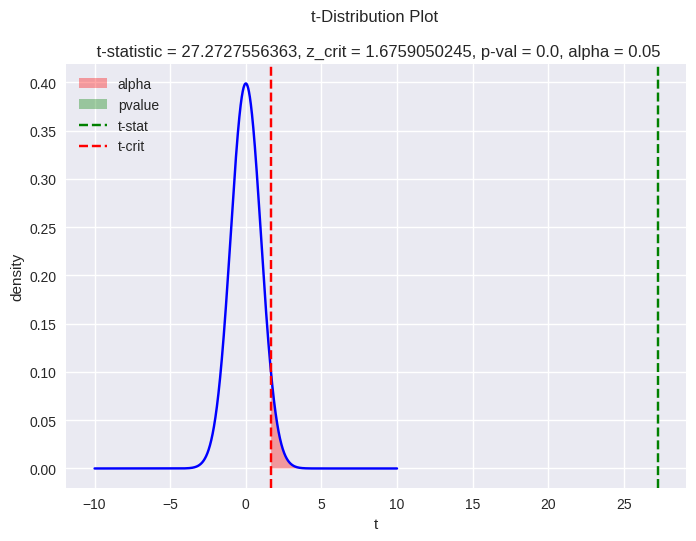

In [14]:
# Visualization
plt.style.use('seaborn')

# plot sample distribution 
x = np.arange(-10, 10, 0.001)
plt.plot(x, stats.t.pdf(x, df = 18163 ), 
         color='blue')

# plot alpha region
x_alpha = np.arange(t_crit, 10, 0.05)
y_alpha = stats.t.pdf(x_alpha, df = 18163)
plt.fill_between(x = x_alpha, 
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35, 
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(t_statistics, 10, 0.05)
y_pvalue = stats.t.pdf(x_pvalue, df = 18163)
plt.fill_between(x = x_pvalue, 
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35, 
                 label = 'pvalue')

# plot t-crit and t-stats
plt.axvline(np.round(t_statistics, 10), 
            color ="green", 
            linestyle = "--", 
            label ="t-stat")
plt.axvline(t_crit, 
            color ="red", 
            linestyle = "--", 
            label ="t-crit")

plt.legend()
plt.xlabel("t")
plt.ylabel("density")

plt.title(f't-Distribution Plot \n\n t-statistic = {np.round(t_statistics, 10)}, z_crit = {np.round(t_crit, 10)}, p-val = {np.round(p_value, 10)}, alpha = 0.05');


## Model

In [15]:
def print_coef_std_err(result):
  """
  Function to combine estimated coefficients and standard error in one DataFrame
  :param results: <statsmodels RegressionResultsWrapper> OLS regression results from 
  :return df: <pandas DataFrame> 
  """

  coef = result.params
  std_err = results.bse

  df = pd.DataFrame(data = np.transpose([coef, std_err]),
                    index = coef.index,
                    columns = ["coef", "std_err"])
  return df

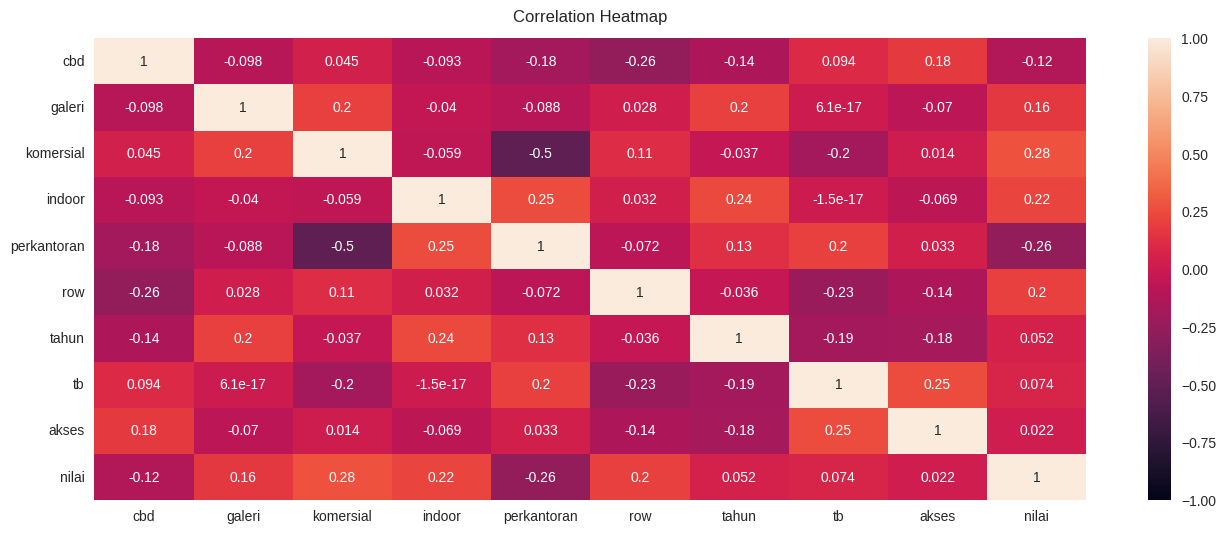

In [16]:
# visualisasi korelasi antar variabel
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Single predictor

In [17]:
#membuat model
model = smf.ols("nilai ~ cbd", df)

#Fit model
results = model.fit()

#cetak ke dataframe
results_df_atm = print_coef_std_err(results)

In [18]:
results_df_atm 

,coef,std_err
Intercept,1.318209e+07,591772.235052
cbd,-2.566199e+02,302.545614


$$\text{nilai} = 13.182.090 - 256,6\text{cbd} $$

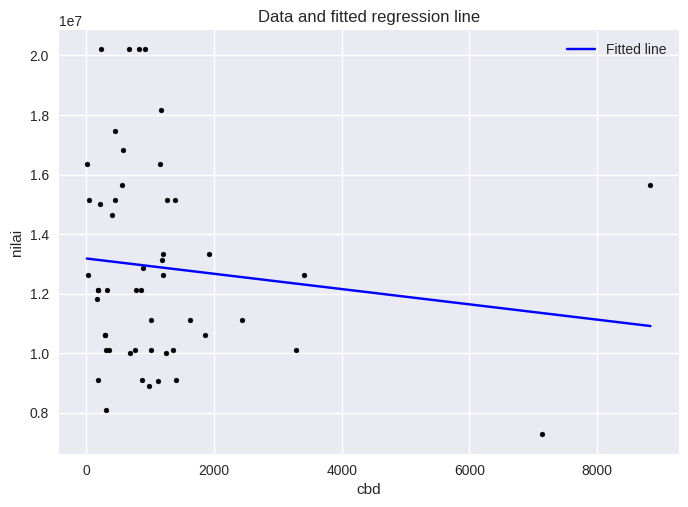

In [19]:
predictor = "cbd"
outcome = "nilai"
data = df.copy()
results_ = results_df_atm.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), len(data))

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
plt.legend()
plt.ylabel("nilai")
plt.xlabel("cbd")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

In [20]:
results.rsquared

0.0144701412009558

In [21]:
df.head(2)

,cbd,galeri,komersial,indoor,perkantoran,row,tahun,tb,akses,nilai
0,186.0,1,0,0,0,10.0,7,1,0,1.212121e+07
1,1855.0,1,0,0,0,10.0,8,1,0,1.060606e+07


## Multiple Linier Regression

In [32]:
#membuat model
model = smf.ols("nilai ~ cbd + komersial", df)

#Fit model
results = model.fit()

#cetak ke dataframe
results_df_atm = print_coef_std_err(results)

In [33]:
results_df_atm

,coef,std_err
Intercept,1.234700e+07,698058.579146
cbd,-2.844284e+02,292.954464
komersial,1.924186e+06,920569.863830


$$\text{nilai} = 12347000 -284,4 \text{cbd} + 1924186 \text{komersial}$$

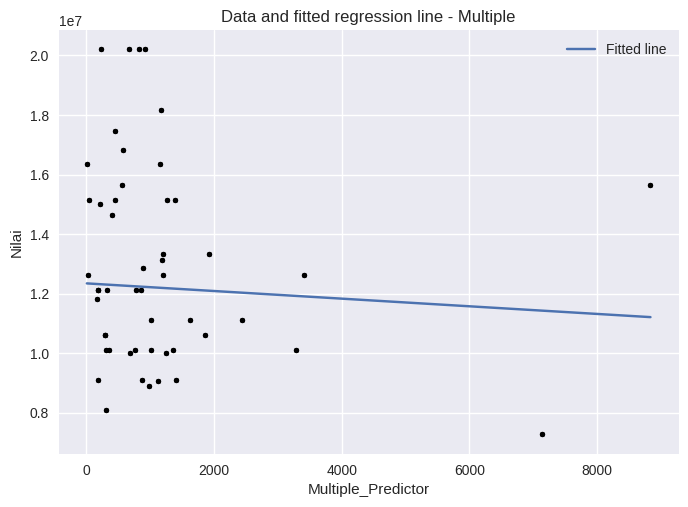

In [23]:
predictors = ["cbd", "komersial"]
outcome = "nilai"
data = df.copy()
results_ = results_df_atm.copy()

# Plot the data
plt.scatter(data[predictors[0]], data[outcome], color = "k", marker=".")


# linestyles = {0 : "--", 1: "-"}
# c = {0 : "b", 1: "g"}
# markers = {0 : "x", 1: "."}

# Plot the data
plt.scatter(data[predictors[0]], data[outcome], color = "k", marker=".")


# x value predictors value
x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), len(data))

# Calculate the fitted values 
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]



fitted_values_multiple = beta0_hat +  beta1_hat   * x_domain * data[predictors[1]].mean()

# Plot two fitted line
plt.plot(x_domain, fitted_values_multiple, label = f"Fitted line")

# Add a legend and labels
plt.legend()
plt.ylabel(f"Nilai")
plt.xlabel(f"Multiple_Predictor")

# Add a title and adjust the margins
plt.title("Data and fitted regression line - Multiple")

# Show the plot
plt.show()

In [24]:
results_df_atm

,coef,std_err
Intercept,1.234700e+07,698058.579146
cbd,-2.844284e+02,292.954464
komersial,1.924186e+06,920569.863830


$$\text{nilai} = 12.347.000 - 284,4\text{cbd} + 1.924.186\text{komersil} $$

## Fit Linear Regression - Include an Interaction

In [25]:
# Create OLS model object
model = smf.ols("nilai ~ cbd + komersial + cbd:komersial", df)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_2 = print_coef_std_err(results)

In [26]:
results_2

,coef,std_err
Intercept,1.152748e+07,6.721423e+05
cbd,4.533548e+02,3.389814e+02
komersial,4.172444e+06,1.052660e+06
cbd:komersial,-1.877592e+03,5.407694e+02


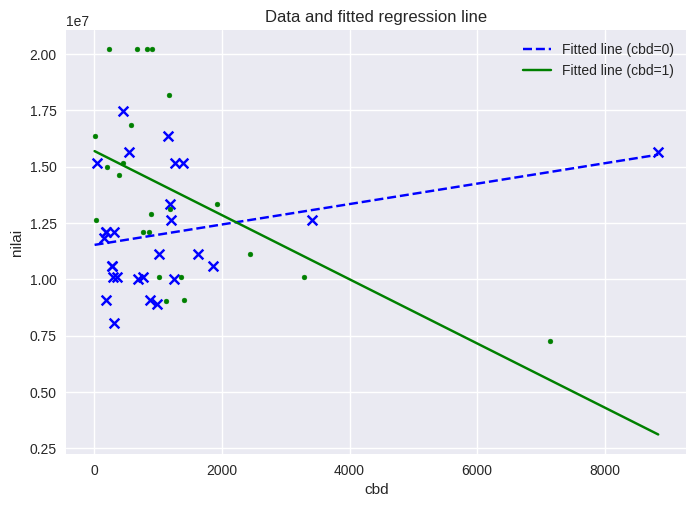

In [28]:
predictors = ["cbd","komersial","cbd:komersial"]
outcome = "nilai"
data = df.copy()
results_ = results_2.copy()
linestyles = {0 : "--", 1: "-"}
c = {0 : "b", 1: "g"}
markers = {0 : "x", 1: "."}

# Plot the data
for i in range(2):
    plt.scatter(data[data[predictors[1]]==i][predictors[0]], data[data[predictors[1]]==i][outcome], 
                color = c[i], marker = markers[i])

# Calculate the fitted values for two lines regarding cbd
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]
beta3_hat = results_.loc[predictors[2]]["coef"]

fitted_values = [beta0_hat +  beta1_hat * x_domain  + beta2_hat * i + beta3_hat * i * x_domain for i in range(2)]

x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), 100)

# Plot two fitted line
for i in range(2):
    plt.plot(x_domain, fitted_values[i], c = c[i], label = f"Fitted line (cbd={i})", linestyle = linestyles[i])

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

In [29]:
results_2

,coef,std_err
Intercept,1.152748e+07,6.721423e+05
cbd,4.533548e+02,3.389814e+02
komersial,4.172444e+06,1.052660e+06
cbd:komersial,-1.877592e+03,5.407694e+02


$$\text{nilai} = 11.527.480 + 453,3\text{cbd} + 4.172.440\text{komersil} - 1.:877,6\text{cbd}*\text{komersial}$$